   # ASSOCIATION RULE MINING

In this report we will be performing Association Rule Mining (ARM) on the 'Employee Attrition' dataset to predict the Attrition  and the corresponding factors causing the outcome. We will also be experimenting with the algorithm by changing the parameters and tuning it.

# Importing the Libraries and Loading the Data:

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt #For plotting
%matplotlib inline
import numpy as np #Provides fast numerical computing such as arrays and linear algebra
import pandas as pd #Provides R like data structures and a high level API to work with data
from pandas import DataFrame, Series
import seaborn as sns #To make your plots look better
import warnings # Ignore  the warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
import mlxtend as ml
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

Once the required libraries are loaded, we can go ahead and intialize the dataset. Missing values are imputed as well.

# Data Exploration and Data Preprocessing:

In [2]:
# read data into file and impute missing values
emp_atr=pd.read_csv("C:/Users/Aditya Ganesh/Desktop/IST 707 - Data Analytics/Week 3/HW1/employee_attrition.csv")
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent', verbose=0)
imputer=imputer.fit(emp_atr.iloc[:,[5,11,14,22,23,24,25,28,33]])
emp_atr.iloc[:,[5,11,14,22,23,24,25,28,33]]=imputer.transform(emp_atr.iloc[:,[5,11,14,22,23,24,25,28,33]])
data = emp_atr.drop(emp_atr.columns[[8,21,26]],axis=1) #Removing 'Over18','StandardHours','EmployeeCount'
delete_row = data[data["DistanceFromHome"]==(224)].index
data = data.drop(delete_row)
delete_row = data[data["YearsWithCurrManager"]==219].index
data = data.drop(delete_row)

There were missing values in certain attributes like 'PercentSalaryHike', 'DistanceFromHome' and 'PerformanceRating' 
which was replaced with most frequent values in their columns. After updating with new values, the attributes are checked for null values.

In [3]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [4]:
# statistical summary of features
emp_atr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.960034,800.386905,9.482993,2.895408,1.0,1036.430272,2.704932,65.822279,2.740646,2.068878,...,2.718537,80.0,0.795918,11.400510,2.809524,2.747449,6.918367,4.151361,2.123299,4.242347
std,9.071964,404.709216,10.247310,1.025685,0.0,600.681874,1.094128,20.292035,0.719277,1.109119,...,1.083664,0.0,0.847033,8.361938,1.307697,0.691586,6.107140,3.501618,3.182816,7.210390
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,461.750000,2.000000,2.000000,1.0,499.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,796.000000,7.000000,3.000000,1.0,1032.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1162.000000,14.000000,4.000000,1.0,1574.500000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1499.000000,224.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,114.000000,6.000000,4.000000,40.000000,18.000000,15.000000,219.000000


# Visualizing the Data:

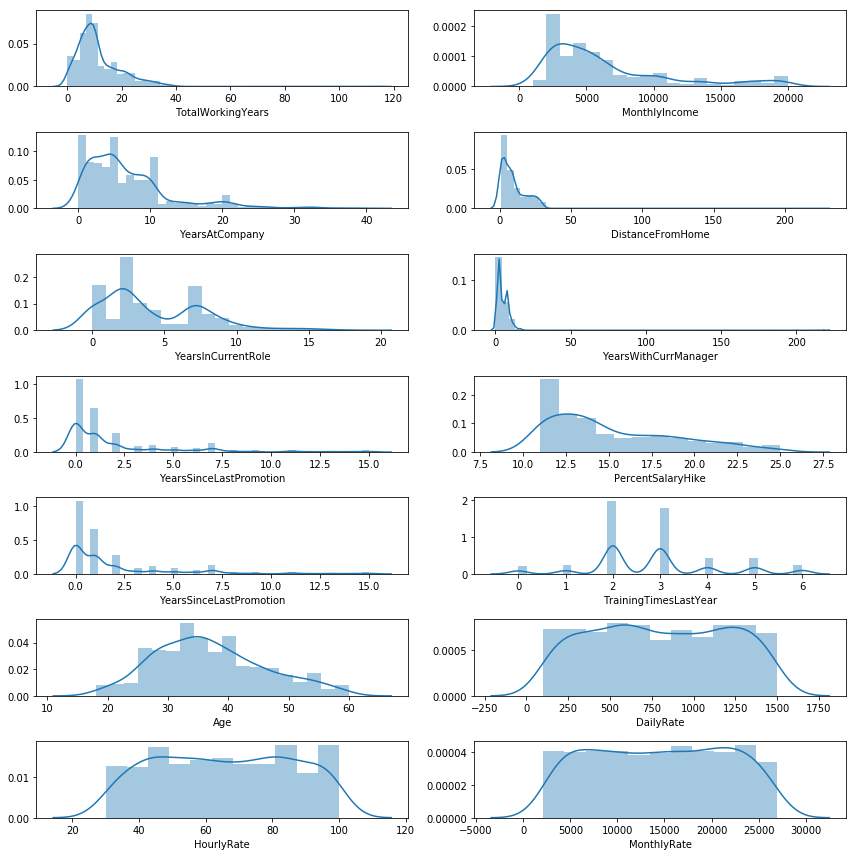

In [5]:
# Plotting distribution of numerical features
fig,ax = plt.subplots(7,2, figsize=(12,12))                
sns.distplot(emp_atr['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(emp_atr['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(emp_atr['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(emp_atr['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(emp_atr['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(emp_atr['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(emp_atr['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(emp_atr['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(emp_atr['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(emp_atr['TrainingTimesLastYear'], ax = ax[4,1]) 
sns.distplot(emp_atr['Age'],ax = ax[5,0])
sns.distplot(emp_atr['DailyRate'],ax = ax[5,1])
sns.distplot(emp_atr['HourlyRate'],ax = ax[6,0])
sns.distplot(emp_atr['MonthlyRate'],ax = ax[6,1])
plt.tight_layout()
plt.show()

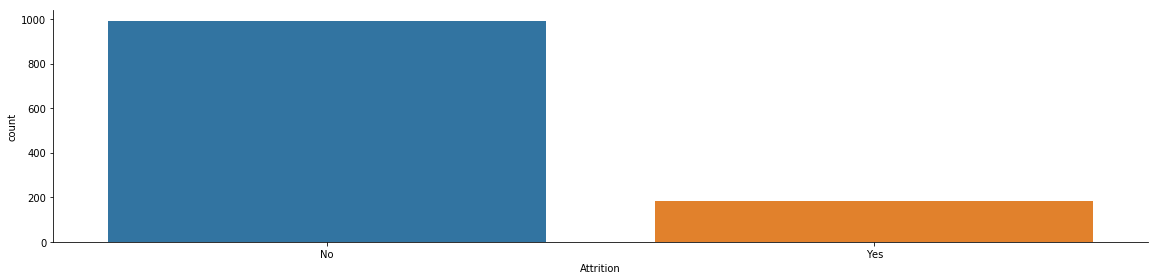

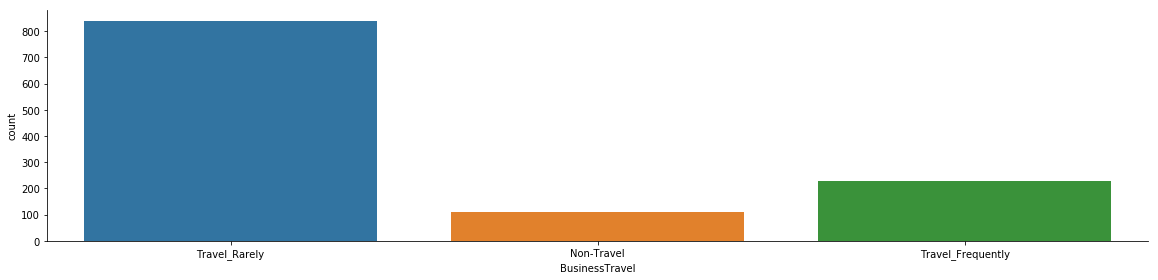

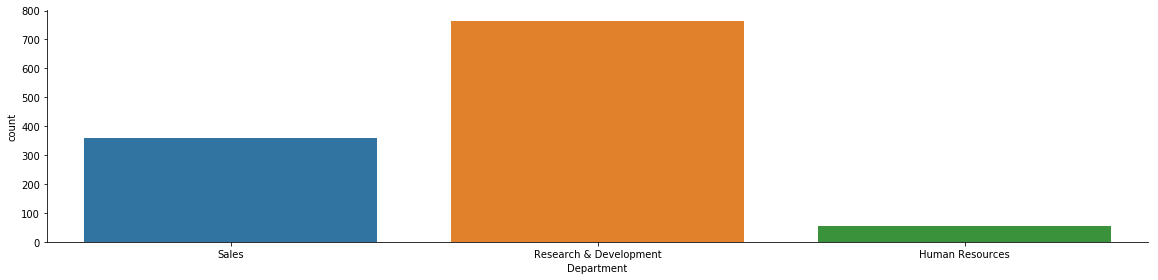

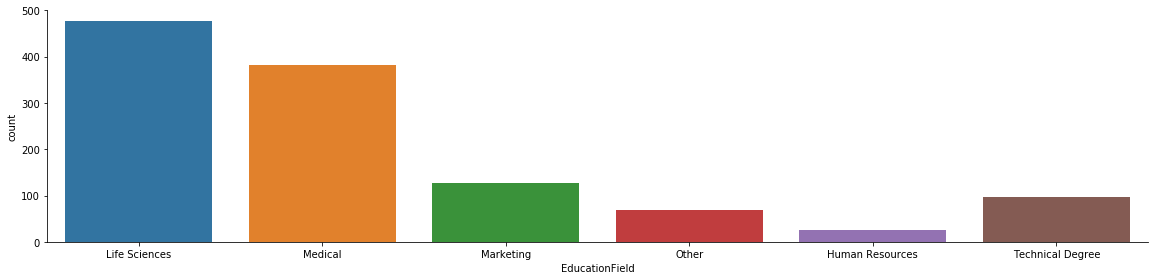

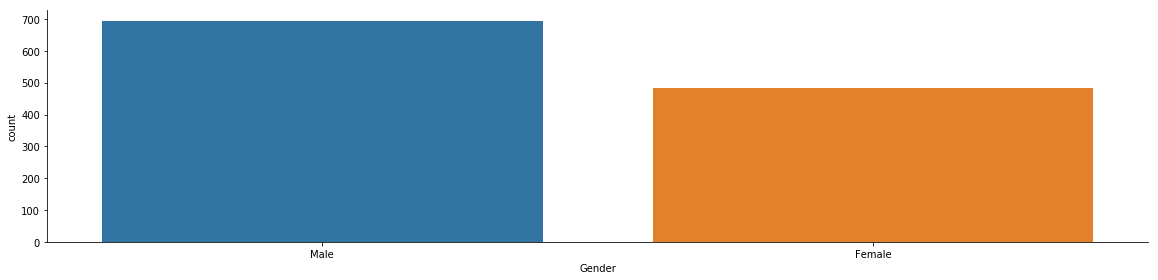

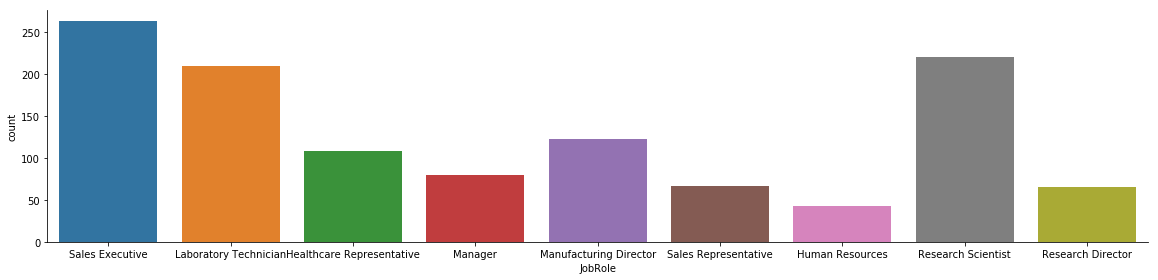

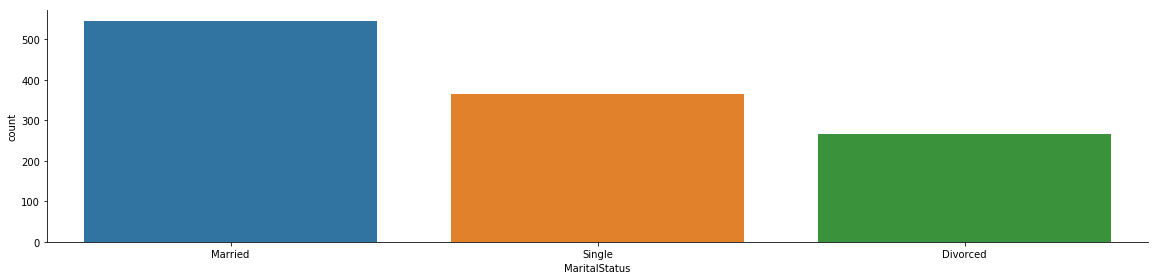

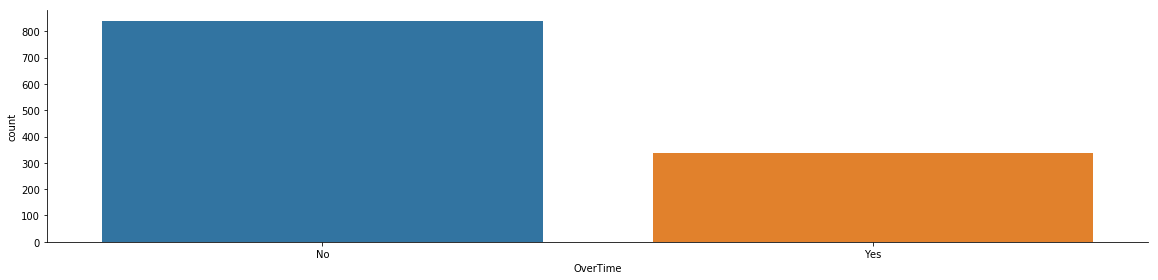

In [6]:
# distribution of categorical variables
cat_ea=emp_atr.select_dtypes(include='object')
def cat_ea_plot(attr):
    if(attr):
        sns.factorplot(data=cat_ea,kind='count',size=4,aspect=4,x=attr)
        return 
cat_ea_plot('Attrition')
cat_ea_plot('BusinessTravel')
cat_ea_plot('Department')
cat_ea_plot('EducationField')
cat_ea_plot('Gender')
cat_ea_plot('JobRole')
cat_ea_plot('MaritalStatus')
cat_ea_plot('OverTime')

In [6]:
# convert data types for a few columns
cat_cols = ['Education','EnvironmentSatisfaction','JobLevel','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance']
for col in cat_cols:
    data[col]=data[col].astype('category')

Function for creating Labels and Bins are written inorder spilt each attribute with equal bin intervals and respective labels 
to be considered for association rule mining.

In [7]:
# bin and label numericals
def label_column_data(data, col, col_name):
    data[col] = [(str(x) +"_"+col_name) for x in data[col]]
    return data

def create_bins_and_label(data, col, no_of_bins):
    # create bins
    new_col = col + "_cleaned"
    data[new_col] = pd.cut(data[col], no_of_bins)
    
    #drop the old column
    data = data.drop(col, axis = 1)
    
    # label columns
    data = label_column_data(data, new_col, col)
    return data

# clean and label categoricals
catData = data.select_dtypes(include='category')
data = data.drop(cat_cols, axis =1)
for col in catData.columns:
    catData[col] = [(str(x) +"_"+col) for x in catData[col]]

old_data = data
data = create_bins_and_label(data, 'YearsSinceLastPromotion', 3)
data = create_bins_and_label(data, 'YearsWithCurrManager',3 )
data = create_bins_and_label(data, 'YearsInCurrentRole',3 )
data = create_bins_and_label(data, 'TotalWorkingYears',3 )
data = create_bins_and_label(data, 'PercentSalaryHike',3 )
data = create_bins_and_label(data, 'NumCompaniesWorked',3 )
data = create_bins_and_label(data, 'YearsAtCompany', 4)
data = create_bins_and_label(data, 'MonthlyIncome', 4)
data = create_bins_and_label(data, 'HourlyRate', 4)
data = create_bins_and_label(data, 'MonthlyRate', 6)

data["age_grp"] = pd.cut(data.Age, 3,labels = ['low_age','med_age','high_age'])
data["DailyRate_grp"] = pd.cut(data.DailyRate, 3,labels = ['low_dr','med_dr','high_dr'])
data["DistFromHome_grp"] = pd.cut(data.DistanceFromHome, 3,labels = ['SmallDist','AvgDist','LargeDist'])
data = data.drop(['EmployeeNumber','Age', 'DailyRate', 'DistanceFromHome'], axis = 1)
data = pd.concat([data, catData], axis =1)

One Hot Encoding is performed to the dataset through 'get_dummies' function

In [8]:
newD = pd.get_dummies(data)
newD

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,TrainingTimesLastYear_1_TrainingTimesLastYear,TrainingTimesLastYear_2_TrainingTimesLastYear,TrainingTimesLastYear_3_TrainingTimesLastYear,TrainingTimesLastYear_4_TrainingTimesLastYear,TrainingTimesLastYear_5_TrainingTimesLastYear,TrainingTimesLastYear_6_TrainingTimesLastYear,WorkLifeBalance_1_WorkLifeBalance,WorkLifeBalance_2_WorkLifeBalance,WorkLifeBalance_3_WorkLifeBalance,WorkLifeBalance_4_WorkLifeBalance
0,1,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
5,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
6,1,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
7,1,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
8,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1174 entries, 0 to 1175
Data columns (total 31 columns):
Attrition                          1174 non-null object
BusinessTravel                     1174 non-null object
Department                         1174 non-null object
EducationField                     1174 non-null object
Gender                             1174 non-null object
JobRole                            1174 non-null object
MaritalStatus                      1174 non-null object
OverTime                           1174 non-null object
YearsSinceLastPromotion_cleaned    1174 non-null object
YearsWithCurrManager_cleaned       1174 non-null object
YearsInCurrentRole_cleaned         1174 non-null object
TotalWorkingYears_cleaned          1174 non-null object
PercentSalaryHike_cleaned          1174 non-null object
NumCompaniesWorked_cleaned         1174 non-null object
YearsAtCompany_cleaned             1174 non-null object
MonthlyIncome_cleaned              1174 non-null obje

In [17]:
data.groupby('Attrition').size()

Attrition
No     989
Yes    185
dtype: int64

# ARM with default settings:

In [35]:
rules= apriori(newD,use_colnames=True)
rules

,support,itemsets
0,0.842419,(Attrition_No)
1,0.713799,(BusinessTravel_Travel_Rarely)
2,0.649063,(Department_Research & Development)
3,0.590290,(Gender_Male)
4,0.713799,(OverTime_No)
5,0.860307,"(YearsSinceLastPromotion_cleaned_(-0.015, 5.0]..."
6,0.663543,"(YearsWithCurrManager_cleaned_(-0.017, 5.667]_..."
7,0.675468,"(YearsInCurrentRole_cleaned_(-0.018, 6.0]_Year..."
8,0.997445,"(TotalWorkingYears_cleaned_(-0.114, 38.0]_Tota..."
9,0.611584,"(PercentSalaryHike_cleaned_(10.986, 15.667]_Pe..."


# ARM with Support

In [36]:
rules= apriori(newD,min_support=0.75,use_colnames=True)
rules

,support,itemsets
0,0.842419,(Attrition_No)
1,0.860307,"(YearsSinceLastPromotion_cleaned_(-0.015, 5.0]..."
2,0.997445,"(TotalWorkingYears_cleaned_(-0.114, 38.0]_Tota..."
3,0.843271,"(YearsAtCompany_cleaned_(-0.04, 10.0]_YearsAtC..."
4,0.837308,(PerformanceRating_3.0_PerformanceRating)
5,0.841567,"(Attrition_No, TotalWorkingYears_cleaned_(-0.1..."
6,0.859455,"(TotalWorkingYears_cleaned_(-0.114, 38.0]_Tota..."
7,0.770869,"(YearsAtCompany_cleaned_(-0.04, 10.0]_YearsAtC..."
8,0.843271,"(YearsAtCompany_cleaned_(-0.04, 10.0]_YearsAtC..."
9,0.834753,"(TotalWorkingYears_cleaned_(-0.114, 38.0]_Tota..."


In [12]:
rules_list = list(rules['itemsets'])
rules_list

[frozenset({'Attrition_No'}),
 frozenset({'YearsSinceLastPromotion_cleaned_(-0.015, 5.0]_YearsSinceLastPromotion'}),
 frozenset({'TotalWorkingYears_cleaned_(-0.114, 38.0]_TotalWorkingYears'}),
 frozenset({'YearsAtCompany_cleaned_(-0.04, 10.0]_YearsAtCompany'}),
 frozenset({'PerformanceRating_3.0_PerformanceRating'}),
 frozenset({'Attrition_No',
            'TotalWorkingYears_cleaned_(-0.114, 38.0]_TotalWorkingYears'}),
 frozenset({'TotalWorkingYears_cleaned_(-0.114, 38.0]_TotalWorkingYears',
            'YearsSinceLastPromotion_cleaned_(-0.015, 5.0]_YearsSinceLastPromotion'}),
 frozenset({'YearsAtCompany_cleaned_(-0.04, 10.0]_YearsAtCompany',
            'YearsSinceLastPromotion_cleaned_(-0.015, 5.0]_YearsSinceLastPromotion'}),
 frozenset({'TotalWorkingYears_cleaned_(-0.114, 38.0]_TotalWorkingYears',
            'YearsAtCompany_cleaned_(-0.04, 10.0]_YearsAtCompany'}),
 frozenset({'PerformanceRating_3.0_PerformanceRating',
            'TotalWorkingYears_cleaned_(-0.114, 38.0]_TotalWorki

# ARM with Association Rules - Support, Confidence and Lift

The hyper parameters are changed for tuning and getting appropriate rules.

In [28]:
frequent_itemsets = apriori(newD, min_support=0.6, use_colnames=True)
frequent_itemsets.sort_values(by='support',ascending=False).head(10)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()
final_rules = rules[(rules['lift']>1) & (rules['confidence'] > 0.8)]
final_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(BusinessTravel_Travel_Rarely),(Attrition_No),0.713799,0.842419,0.612436,0.857995,1.018490,0.011118,1.109687
3,(OverTime_No),(Attrition_No),0.713799,0.842419,0.636286,0.891408,1.058153,0.034968,1.451130
4,(Attrition_No),"(TotalWorkingYears_cleaned_(-0.114, 38.0]_Tota...",0.842419,0.997445,0.841567,0.998989,1.001548,0.001301,2.527257
5,"(TotalWorkingYears_cleaned_(-0.114, 38.0]_Tota...",(Attrition_No),0.997445,0.842419,0.841567,0.843723,1.001548,0.001301,1.008346
7,(DistFromHome_grp_SmallDist),(Attrition_No),0.695911,0.842419,0.604770,0.869033,1.031592,0.018521,1.203211
8,(Attrition_No),(PerformanceRating_3.0_PerformanceRating),0.842419,0.837308,0.708688,0.841254,1.004712,0.003324,1.024854
9,(PerformanceRating_3.0_PerformanceRating),(Attrition_No),0.837308,0.842419,0.708688,0.846389,1.004712,0.003324,1.025841
10,(BusinessTravel_Travel_Rarely),"(YearsSinceLastPromotion_cleaned_(-0.015, 5.0]...",0.713799,0.860307,0.615843,0.862768,1.002862,0.001757,1.017939
12,(BusinessTravel_Travel_Rarely),"(TotalWorkingYears_cleaned_(-0.114, 38.0]_Tota...",0.713799,0.997445,0.712095,0.997613,1.000169,0.000120,1.070698
15,(BusinessTravel_Travel_Rarely),"(YearsAtCompany_cleaned_(-0.04, 10.0]_YearsAtC...",0.713799,0.843271,0.603066,0.844869,1.001895,0.001141,1.010300


Plotting the data using Scatter Plot

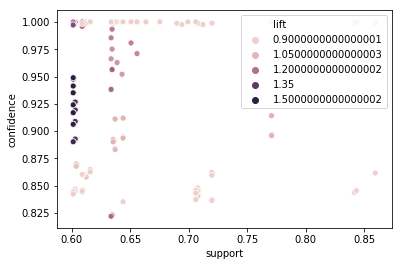

In [39]:
b = sns.scatterplot(data=final_rules,x='support',y='confidence',hue='lift')
plt.show()

# The goal of this assignment is to use the Association Rule Mining to predict the Attrition. 

In [30]:
final_rules[["Attrition_No" in list(x) for x in final_rules['consequents']]]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(BusinessTravel_Travel_Rarely),(Attrition_No),0.713799,0.842419,0.612436,0.857995,1.018490,0.011118,1.109687
3,(OverTime_No),(Attrition_No),0.713799,0.842419,0.636286,0.891408,1.058153,0.034968,1.451130
5,"(TotalWorkingYears_cleaned_(-0.114, 38.0]_Tota...",(Attrition_No),0.997445,0.842419,0.841567,0.843723,1.001548,0.001301,1.008346
7,(DistFromHome_grp_SmallDist),(Attrition_No),0.695911,0.842419,0.604770,0.869033,1.031592,0.018521,1.203211
9,(PerformanceRating_3.0_PerformanceRating),(Attrition_No),0.837308,0.842419,0.708688,0.846389,1.004712,0.003324,1.025841
52,"(BusinessTravel_Travel_Rarely, TotalWorkingYea...",(Attrition_No),0.712095,0.842419,0.612436,0.860048,1.020926,0.012553,1.125963
54,(BusinessTravel_Travel_Rarely),"(Attrition_No, TotalWorkingYears_cleaned_(-0.1...",0.713799,0.841567,0.612436,0.857995,1.019521,0.011726,1.115686
58,"(OverTime_No, TotalWorkingYears_cleaned_(-0.11...",(Attrition_No),0.712095,0.842419,0.635434,0.892344,1.059264,0.035552,1.463752
60,(OverTime_No),"(Attrition_No, TotalWorkingYears_cleaned_(-0.1...",0.713799,0.841567,0.635434,0.890215,1.057806,0.034725,1.443115
70,"(PerformanceRating_3.0_PerformanceRating, Year...",(Attrition_No),0.720613,0.842419,0.609881,0.846336,1.004649,0.002822,1.025488


The output consists of 16 Rules. In this we are able to clearly see that 
1)when employees are asked to travel rarely, they are more likely to love their job and stay back in the company.
2)when the employees are not asked to work overtime, they are more likely to love their job and stay back in the company.
3)when the distance from the house to the office of an employee is less, they are more likely to love their job and stay back in the company.
4)when the performance rating of the employee is 3 (Very Good), they are more likely to love their job and stay back in the company.
# Maximum value for Support = 0.846517 and their respective confidence and Lift Values are 0.843723 and 1.001548.